# Geely Auto price prediction

#### By: Harshit Mehta

## Objective:

Required to model the price of cars with the available independent variables

In [1]:
#importing the necerssary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
import pandas_profiling
import statsmodels
import statsmodels.api as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv',encoding = "ISO-8859-1")

In [3]:
df.profile_report(style={'full_width':True})

In [4]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
df.shape

(205, 26)

## Data Cleaning & Preparation

In [6]:
#finding missing values in % per column
missing = round(100*(df.isnull().sum()/len(df.car_ID)), 2)
missing.loc[missing > 0]

Series([], dtype: float64)

Thus there are no missing values in the data set.

In [7]:
# Finding the duplicates(if any) and dropping them
df=df.drop_duplicates()

Let's make use of **Data Dictionary** to get a better understanding of the columns.

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
# Car_ID - ID for every car - Not useful for our Analysis
len(df.car_ID.value_counts())

205

In [10]:
# Deriving the Car Company out of the car name
df["company"] = df["CarName"].apply(lambda x:x.split(" ")[0])

In [11]:
df["company"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
vw              2
maxda           2
vokswagen       1
mercury         1
porcshce        1
toyouta         1
Nissan          1
Name: company, dtype: int64

In [12]:
sorted(set(df["company"]))

['Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw']

**We notice that certain companies have been considered as different entities (speeling error, different case):**
<br> nissan - nissan , Nissan
<br> mazda - mazda , maxda (no such company exists)
<br> porsche - porsche , porcshce
<br> toyota - toyota , toyouta
<br> volkswagen - volkswagen , vokswagen , vw

Thus correcting the data entry error.

In [13]:
df["company"] = df["company"].str.replace("Nissan","nissan")
df["company"] = df["company"].str.replace("maxda","mazda")
df["company"] = df["company"].str.replace("porcshce","porsche")
df["company"] = df["company"].str.replace("toyouta","toyota")
df["company"] = df["company"].str.replace("vokswagen","volkswagen")
df["company"] = df["company"].str.replace("vw","volkswagen")

In [14]:
df["company"].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64

Some columns seem to be unessential / possess all unique values / highly corelated - Thus not significant for our analysis.

They are given as follows:

   1. **car_ID** :
   It's a random number given to the car. - **NOT NEEDED FOR ANALYSIS**
   2. **CarName** :
   We have already derived ***company name*** which we will treat for analysis, specific carname is not required -  **NOT NEEDED FOR ANALYSIS**

Dropping the above columns from the dataframe.


In [15]:
dropped_cols = ['car_ID','CarName']
df= df.drop(dropped_cols,axis=1)

In [16]:
df.shape

(205, 25)

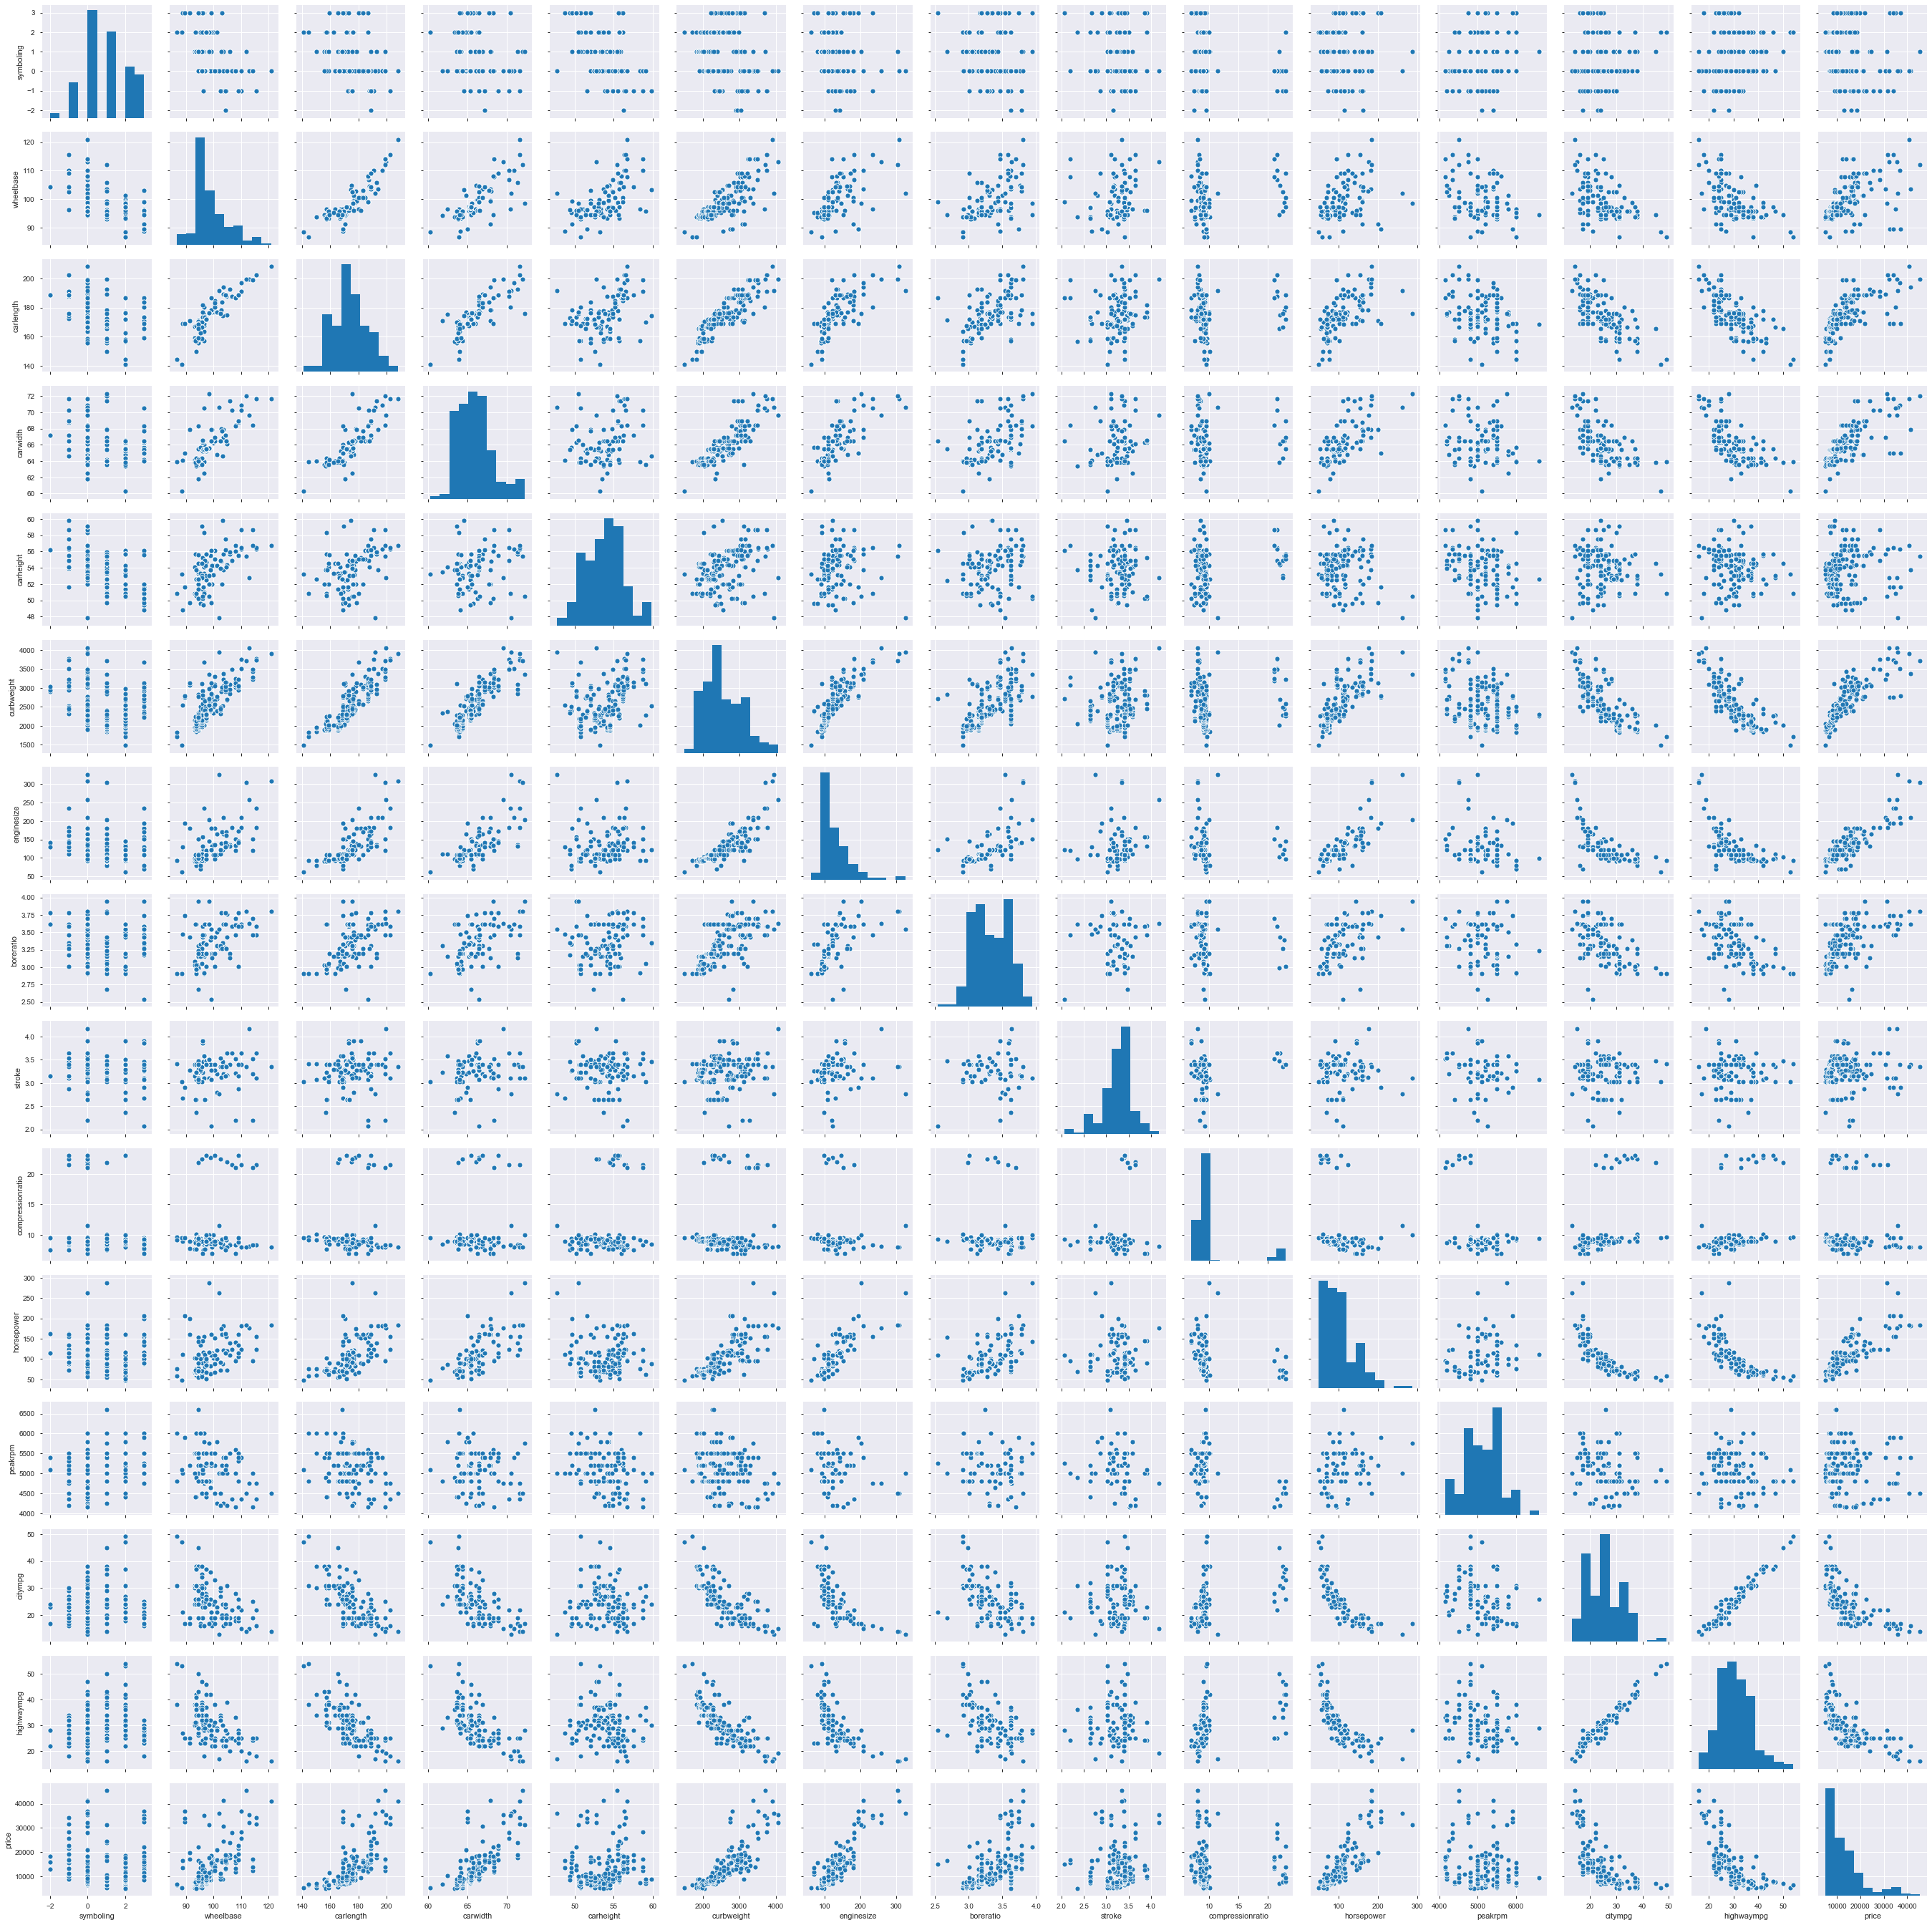

In [17]:
sns.pairplot(df)

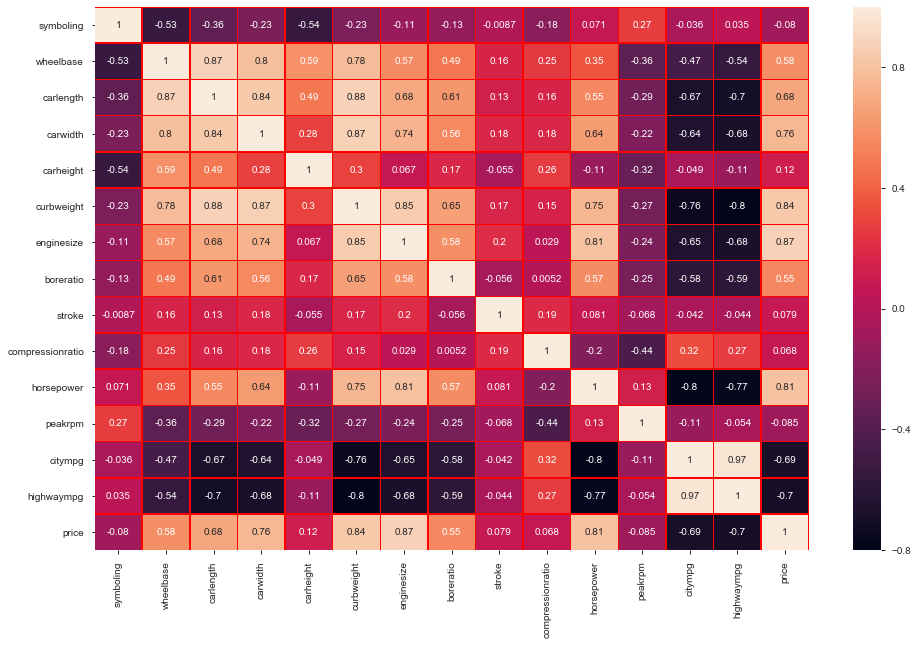

In [18]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True,linewidths=0.5,linecolor='r')

Now, we can have an overall idea that which features are related to price. We observe that some features have some kind of positive relationship with 'price'. These are given as follows:
- **wheelbase**
- **carlength**
- **carwidth**
- **curbweight**
- **enginesize**
- **boreratio**
- **horsepower**
<br><br>However, there are some attributes/variables that show a negative relationship with price:
- **citympg**
- **highwaympg**
<br><br>We can also observe some multicollinearity visible between the predictor variables:
- **carlength** with **wheelbase, carwidth, curbweight**
- **curbweight** with **enginesize, carlength, carwidth, wheelbase**
- **enginesize** with **horsepower, crubweight and dimensions** of car
- **highwaympg** and **citympg** are highly correlated (~ 0.97).
<br>Let us observe the categorical variables present in our data.
<br>***Symboling*** is a categorical variable which has been considered as a numeric int64 type variable. Let us convert the symboling variable.
<br>Here Symboling is the assigned insurance risk rating - A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
<br>Let us define the category clearly by classifying it on the basis of the risk:
<br>-ve symboling as safe
<br>0, 1 as moderate
<br>2,3 as risky

In [19]:
df['symboling'] = df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

Let's see how these categorical variables relate individually with price.

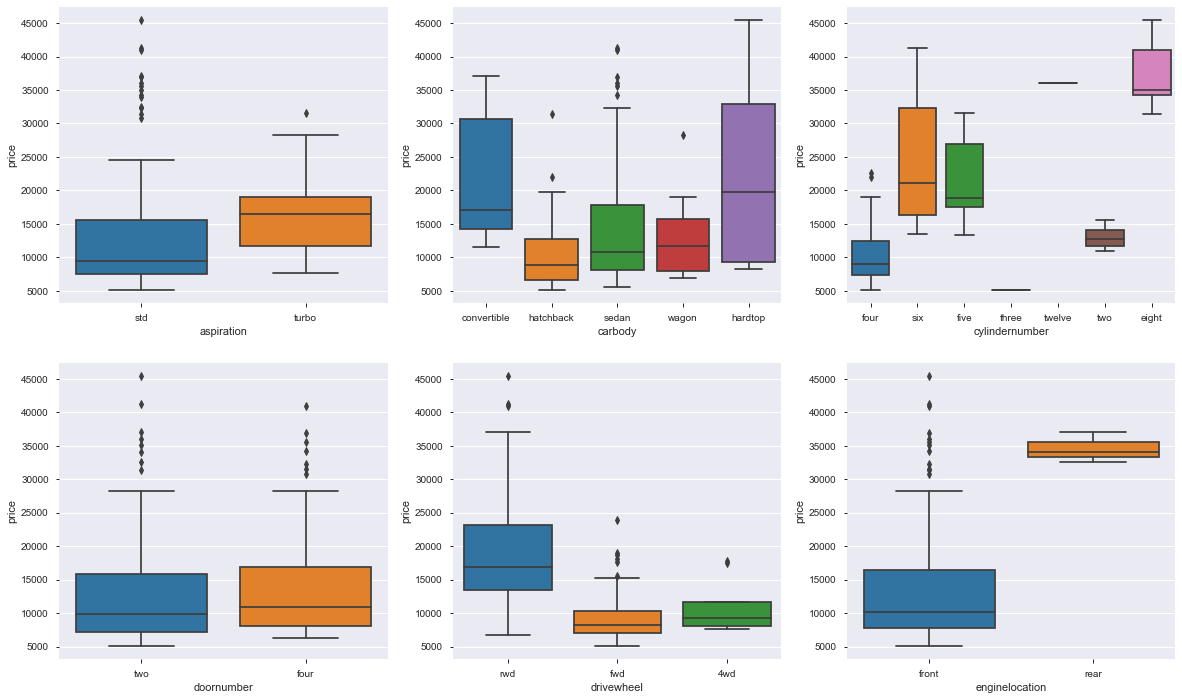

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.show()

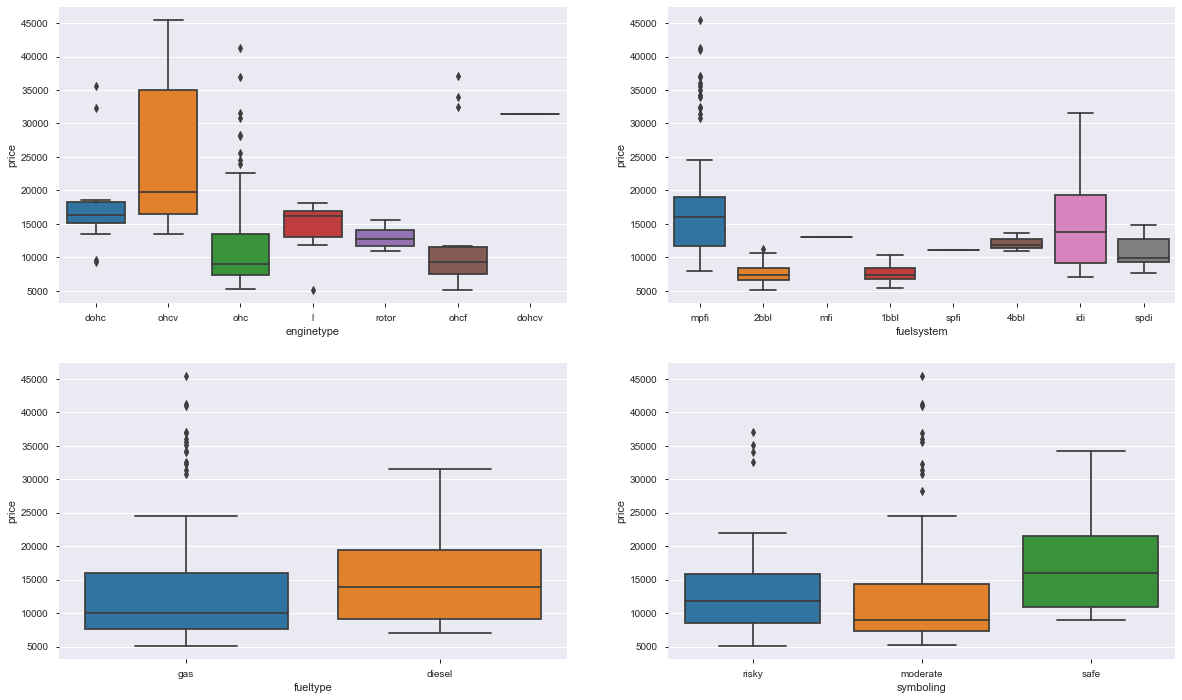

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.show()

#### Insights :
- The **fuel type** tends to have an effect on the price of the cars.
- **enginelocation and aspiration** have a significant affect on the pricing of the car.
- The price of **real wheel drive** is quite higher that other drivewheel options.
- **cylindernumber and engine type** also seem to regulate the price of cars.
- We also observe that **hardtop and convertables** cars are priced quite higher than the other body types.

Let's see the **company** effect on the prices :

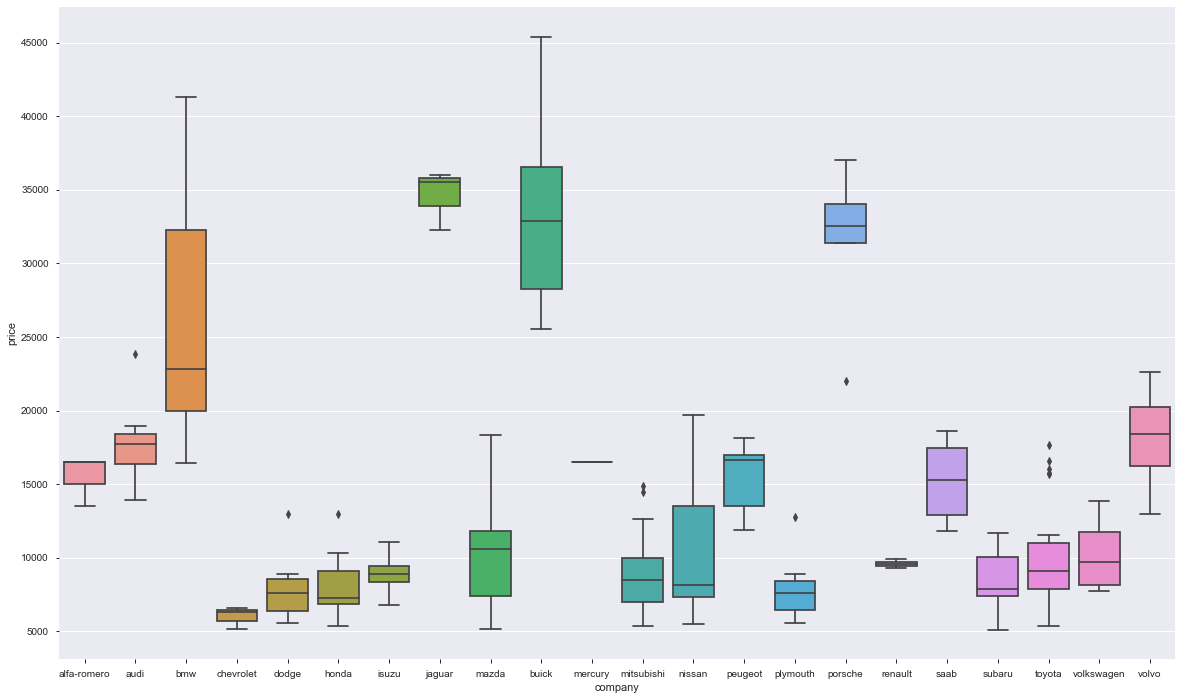

In [22]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'company', y = 'price', data = df)
plt.show()

#### INSIGHTS:
- There are some outliers for the companies which demonstrates that they do manufacture some expensive cars that are priced above their usual market pricing range.
- Cars manufacturers like Jaguar, Buick, Porsche, BMW and Volo are on the high end side and are priced well above the other US cars which have an average price of approx. $13,000.
- Also, company name shows some affect on the price determination.

In [23]:
companies_list = ['audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
companies_list.append("price")

### Outlier treatment
It is extremely necessary that we treat the outliers before modeling as Linear Regression is sensitive to outliers.

In [24]:
numeric_variables = list(df.columns[df.dtypes != 'object'])
print(numeric_variables)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


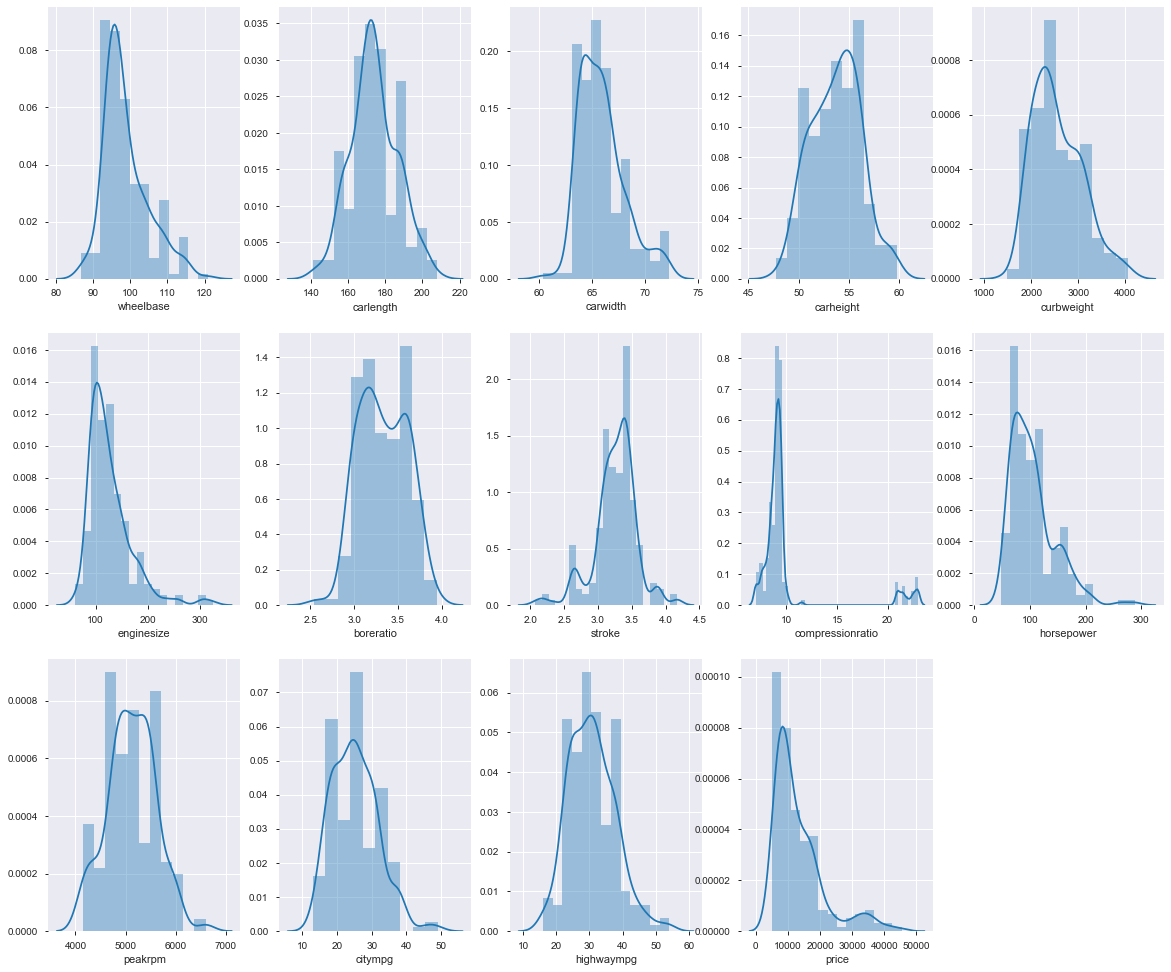

In [25]:
plt.figure(figsize=(20, 17))
plt.subplot(3,5,1)
sns.distplot(df['wheelbase'])
plt.subplot(3,5,2)
sns.distplot(df['carlength'])
plt.subplot(3,5,3)
sns.distplot(df['carwidth'])
plt.subplot(3,5,4)
sns.distplot(df['carheight'])
plt.subplot(3,5,5)
sns.distplot(df['curbweight'])
plt.subplot(3,5,6)
sns.distplot(df['enginesize'])
plt.subplot(3,5,7)
sns.distplot(df['boreratio'])
plt.subplot(3,5,8)
sns.distplot(df['stroke'])
plt.subplot(3,5,9)
sns.distplot(df['compressionratio'])
plt.subplot(3,5,10)
sns.distplot(df['horsepower'])
plt.subplot(3,5,11)
sns.distplot(df['peakrpm'])
plt.subplot(3,5,12)
sns.distplot(df['citympg'])
plt.subplot(3,5,13)
sns.distplot(df['highwaympg'])
plt.subplot(3,5,14)
sns.distplot(df['price'])

#### INSIGHT:
We notice that **enginesize, horsepower and compression ratio** variables tend to have a right skewed distribution which is probably due to the presence of the outliers

In [26]:
print(df[['horsepower','curbweight','enginesize']].quantile([0.01, .95]))
print(df[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.95      180.80     3503.00       201.2
      compressionratio
0.01              7.00
0.90             10.94


Clipping the variables **curbweight, horsepower and enginesize** at 95 precentile value. Will be clipping **compressionratio** at 90 percentile value.

In [27]:
# Outliers in the price of cars
df['horsepower'][np.abs(df['horsepower'] > 180.80)]= 180.80
df['curbweight'][np.abs(df['curbweight'] > 3503.00)]= 3503.00
df['enginesize'][np.abs(df['enginesize'] > 201.2)]= 201.2
df['compressionratio'][np.abs(df['compressionratio'] > 10.94)]= 10.94

Let us preserve the data for which the price is less than **3 standard deviation.**

In [28]:
df = df[np.abs(df.price-df.price.mean()) <= (3*df.price.std())]

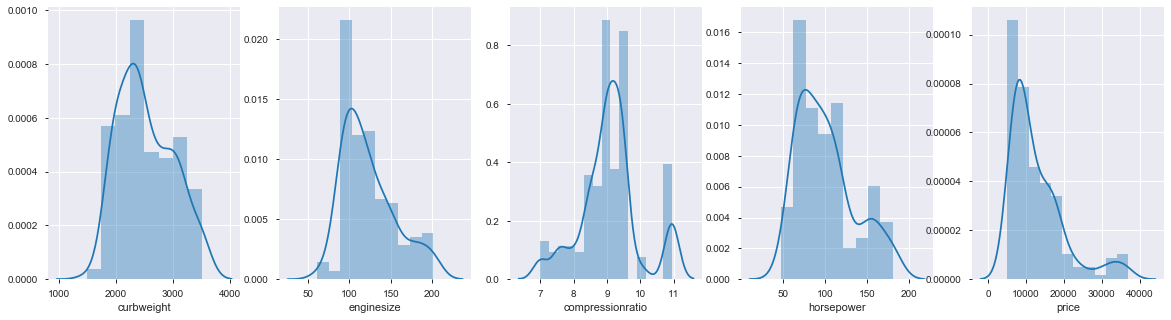

In [29]:
plt.figure(figsize=(20, 5))
plt.subplot(1,5,1)
sns.distplot(df['curbweight'])
plt.subplot(1,5,2)
sns.distplot(df['enginesize'])
plt.subplot(1,5,3)
sns.distplot(df['compressionratio'])
plt.subplot(1,5,4)
sns.distplot(df['horsepower'])
plt.subplot(1,5,5)
sns.distplot(df['price'])

### Creating fresh variables
<br>This will be acting as an aid to remove corelated variables.<br>
<br>Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between **carlength, wheelbase, car width, car weight and city/highway mpg's.** Let us create new variables from these to try reducing the multicollinearlity.


In [30]:
df['car_lw_ratio'] = df.carlength/df.carwidth
df['car_wh_ratio'] = df.carwidth/df.carheight
df['pw_ratio'] = df.horsepower/df.curbweight
df['hc_mpg_ratio'] = df.highwaympg/df.citympg

## dropping the orignal variables
df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

We saw that the **company** brand value also is determinig the price of the car. Let us create a company_seg categorical variable which would tell us that under which segment tier does the car_company comes under. We will segment the car companies based on the mean company price as :
<br>
- lowtier if company mean price is below 10,000
- midtier if company mean price is above 10,000 and below 20,000
- hightier if company mean price is above 20,000

In [31]:
df.groupby('company').price.mean().sort_values(ascending=False)

company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [32]:
company_seg_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
df['company_seg'] = df['company'].map(company_seg_dict)
# Dropping the orignal car_company variable
df.drop('company',axis=1,inplace=True)
df.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  curbweight enginetype  ... stroke  \
0          front       88.6        2548       dohc  ...   2.68   
1          front       88.6        2548       dohc  ...   2.68   
2          front       94.5        2823       ohcv  ...   3.47   
3          front       99.8        2337        ohc  ...   3.40   
4          front       99.4        2824        ohc  ...   3.40   

   compressionratio horsepower  peakrpm    price  car_lw_ratio  car_wh_ratio  \
0               9.0      111.0     5000  13495.0      2.633385      1.313525   
1               9.0      111.0     5000  16500.0      2.633385      1.313525   
2               9.0      154.0     5000  16500.0      2.613740      1.250000   
3              10.0      102.0     5500  13950.0      2.667674      1.219153   
4               8.0      115.0     5500  17450.0      2.659639      1.222836   

   pw_ratio  hc_mpg_ratio  company_seg  
0  0.043564      1.285714      midtier  
1  0.043564      1.285714      midtier  
2  0.054552      1.368421      midtier  
3  0.043646      1.250000      midtier  
4  0.040722      1.222222      midtier  

[5 rows x 24 columns]

In [33]:
df.groupby('company_seg').price.mean()

company_seg
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

In [34]:
# Converting categorical variables with two levels to either 1 or 0
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})
df.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0     risky         1           1           1  convertible        rwd   
1     risky         1           1           1  convertible        rwd   
2  moderate         1           1           1    hatchback        rwd   
3     risky         1           1           0        sedan        fwd   
4     risky         1           1           0        sedan        4wd   

   enginelocation  wheelbase  curbweight enginetype  ... stroke  \
0               1       88.6        2548       dohc  ...   2.68   
1               1       88.6        2548       dohc  ...   2.68   
2               1       94.5        2823       ohcv  ...   3.47   
3               1       99.8        2337        ohc  ...   3.40   
4               1       99.4        2824        ohc  ...   3.40   

   compressionratio horsepower  peakrpm    price  car_lw_ratio  car_wh_ratio  \
0               9.0      111.0     5000  13495.0      2.633385      1.313525   
1               9.0      111.0     5000  16500.0      2.633385      1.313525   
2               9.0      154.0     5000  16500.0      2.613740      1.250000   
3              10.0      102.0     5500  13950.0      2.667674      1.219153   
4               8.0      115.0     5500  17450.0      2.659639      1.222836   

   pw_ratio  hc_mpg_ratio  company_seg  
0  0.043564      1.285714      midtier  
1  0.043564      1.285714      midtier  
2  0.054552      1.368421      midtier  
3  0.043646      1.250000      midtier  
4  0.040722      1.222222      midtier  

[5 rows x 24 columns]

In [35]:
# Creating dummy variables
df = pd.get_dummies(df)

# Droping 1 dummy variable and Keeping n-1 variables for each feature 
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_seg_lowtier'],axis=1,inplace=True)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'car_lw_ratio', 'car_wh_ratio',
       'pw_ratio', 'hc_mpg_ratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_seg_hightier', 'company_seg_midtier'],
      dtype='object')

In [36]:
numeric_variables = list(df.columns[df.dtypes != 'object'])
numeric_variables

['fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'price',
 'car_lw_ratio',
 'car_wh_ratio',
 'pw_ratio',
 'hc_mpg_ratio',
 'symboling_moderate',
 'symboling_safe',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'company_seg_hightier',
 'company_seg_midtier']

### Splitting Dataset into Training/Test set

In [37]:
# Splitting the avilable data into training and testing set.

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling of Features

In [38]:
# Scaling all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [39]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','car_lw_ratio','car_wh_ratio','pw_ratio','hc_mpg_ratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
1           1           1           1               1   0.068966    0.526055   
165         1           1           1               1   0.272414    0.385608   
197         1           1           0               1   0.610345    0.771216   
169         1           1           1               1   0.406897    0.527543   
190         1           1           1               1   0.272414    0.363772   

     enginesize  boreratio    stroke  compressionratio  ...  \
1      0.492154   0.664286  0.290476          0.507614  ...   
165    0.263909   0.500000  0.480952          0.609137  ...   
197    0.570613   0.885714  0.514286          0.634518  ...   
169    0.606277   0.771429  0.680952          0.583756  ...   
190    0.342368   0.464286  0.633333          0.380711  ...   

     cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
1                     0                0                0               0   
165                   0                0                0               0   
197                   0                0                0               0   
169                   0                0                0               0   
190                   0                0                0               0   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
1                 0                1                0                0   
165               0                1                0                0   
197               0                1                0                0   
169               0                1                0                0   
190               0                1                0                0   

     company_seg_hightier  company_seg_midtier  
1                       0                    1  
165                     0                    0  
197                     0                    1  
169                     0                    0  
190                     0                    1  

[5 rows x 46 columns]

In [40]:
y_train = df_train.pop('price')
X_train = df_train

### Building a linear model

### RFE

In [41]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting top 15 features
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 13),
 ('aspiration', False, 8),
 ('doornumber', False, 24),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 15),
 ('enginesize', False, 7),
 ('boreratio', True, 1),
 ('stroke', False, 6),
 ('compressionratio', False, 14),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('car_lw_ratio', True, 1),
 ('car_wh_ratio', True, 1),
 ('pw_ratio', True, 1),
 ('hc_mpg_ratio', False, 18),
 ('symboling_moderate', False, 28),
 ('symboling_safe', False, 25),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 22),
 ('carbody_sedan', False, 16),
 ('carbody_wagon', False, 29),
 ('drivewheel_fwd', False, 30),
 ('drivewheel_rwd', False, 27),
 ('enginetype_dohc', False, 4),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 26),
 ('enginetype_rotor', False, 19),
 ('cylindernumber_eight', False, 9),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cy

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'boreratio', 'horsepower', 'peakrpm',
       'car_lw_ratio', 'car_wh_ratio', 'pw_ratio', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_4bbl', 'company_seg_hightier'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'stroke', 'compressionratio', 'hc_mpg_ratio', 'symboling_moderate',
       'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_seg_midtier'],
      dtype='object')

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     158.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.06e-73
Time:                        21:04:05   Log-Likelihood:                 219.51
No. Observations:                 141   AIC:                            -407.0
Df Residuals:                     125   BIC:                            -359.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4775 

**car_lw_ratio** is the least significant of all variables. Let's drop it.

In [49]:
X_train2 = X_train_rfe.drop('car_lw_ratio', axis=1)

In [50]:
lm2 = sm.OLS(y_train,X_train2).fit()   # Running the linear model

In [51]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     170.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.02e-74
Time:                        21:04:05   Log-Likelihood:                 219.22
No. Observations:                 141   AIC:                            -408.4
Df Residuals:                     126   BIC:                            -364.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4660 

**enginetype_dohcv** is the least significant of all variables. Let's drop it.

In [52]:
X_train3 = X_train2.drop('enginetype_dohcv', axis=1)

In [53]:
lm3 = sm.OLS(y_train,X_train3).fit()   # Running the linear model

In [54]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-75
Time:                        21:04:05   Log-Likelihood:                 218.84
No. Observations:                 141   AIC:                            -409.7
Df Residuals:                     127   BIC:                            -368.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4681 

**cylindernumber_five** is the least significant of all variables. Let's drop it.

In [55]:
X_train4 = X_train3.drop('cylindernumber_five', axis=1)

In [56]:
lm4 = sm.OLS(y_train,X_train4).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.99e-76
Time:                        21:04:05   Log-Likelihood:                 217.70
No. Observations:                 141   AIC:                            -409.4
Df Residuals:                     128   BIC:                            -371.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4270 

**fuelsystem_4bbl** is the least significant of all variables. Let's drop it.

In [58]:
X_train5 = X_train4.drop('fuelsystem_4bbl', axis=1)

In [59]:
lm5 = sm.OLS(y_train,X_train5).fit()   # Running the linear model

In [60]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.01e-77
Time:                        21:04:05   Log-Likelihood:                 217.24
No. Observations:                 141   AIC:                            -410.5
Df Residuals:                     129   BIC:                            -375.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4271 

**cylindernumber_six** is the least significant of all variables. Let's drop it.

In [61]:
X_train6 = X_train5.drop('cylindernumber_six', axis=1)

In [62]:
lm6 = sm.OLS(y_train,X_train6).fit()   # Running the linear model

In [63]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.14e-78
Time:                        21:04:05   Log-Likelihood:                 215.71
No. Observations:                 141   AIC:                            -409.4
Df Residuals:                     130   BIC:                            -377.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3861 

**boreratio** is the least significant of all variables. Let's drop it.

In [64]:
X_train7 = X_train6.drop('boreratio', axis=1)

In [65]:
lm7 = sm.OLS(y_train,X_train7).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     254.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.86e-78
Time:                        21:04:05   Log-Likelihood:                 213.77
No. Observations:                 141   AIC:                            -407.5
Df Residuals:                     131   BIC:                            -378.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3486 

Now we can see that all the features are significant. Let's check the **VIF** values :

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  147.25
3            horsepower   16.41
6              pw_ratio   12.74
2             wheelbase    3.74
8   cylindernumber_four    2.09
5          car_wh_ratio    1.88
9  company_seg_hightier    1.86
4               peakrpm    1.71
1        enginelocation    1.51
7   carbody_convertible    1.21

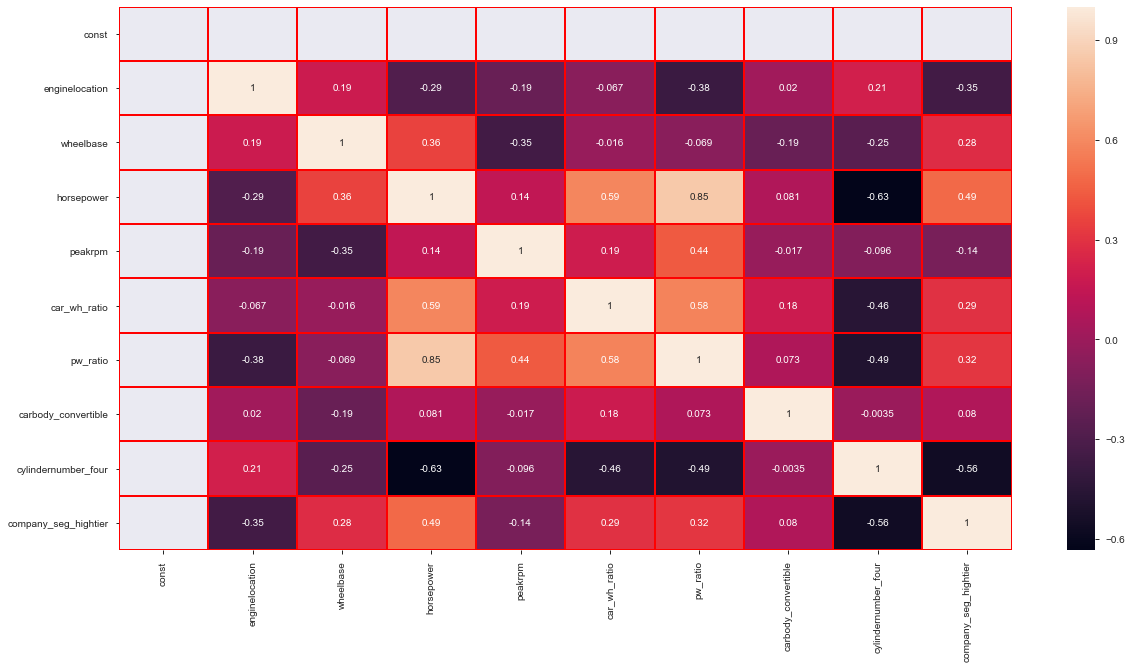

In [68]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train7.corr(),annot = True, linewidths=1, linecolor='r')

- **horsepower**  possesses the highest VIF and is strongly corelated with **pw_ratio and cylindernumber_four**. Let's remove it.

In [69]:
X_train8 = X_train7.drop('horsepower', axis=1)

In [70]:
lm8 = sm.OLS(y_train,X_train8).fit()   # Running the linear model

In [71]:
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     164.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.09e-65
Time:                        21:04:06   Log-Likelihood:                 177.04
No. Observations:                 141   AIC:                            -336.1
Df Residuals:                     132   BIC:                            -309.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2484 

Let's check the VIF table :

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  142.04
5              pw_ratio    2.30
7   cylindernumber_four    1.91
8  company_seg_hightier    1.86
4          car_wh_ratio    1.76
3               peakrpm    1.53
1        enginelocation    1.49
2             wheelbase    1.47
6   carbody_convertible    1.12

<br>All the independent variable have considerably **low VIF** and the **Adj. R-Squared** is 0.903.
<br>We will conclude with these variables as the final model predictor variables.

## Residual Analysis of the training dataset

In [73]:
y_train_price = lm8.predict(X_train8)

Text(0.5, 0, 'Errors')

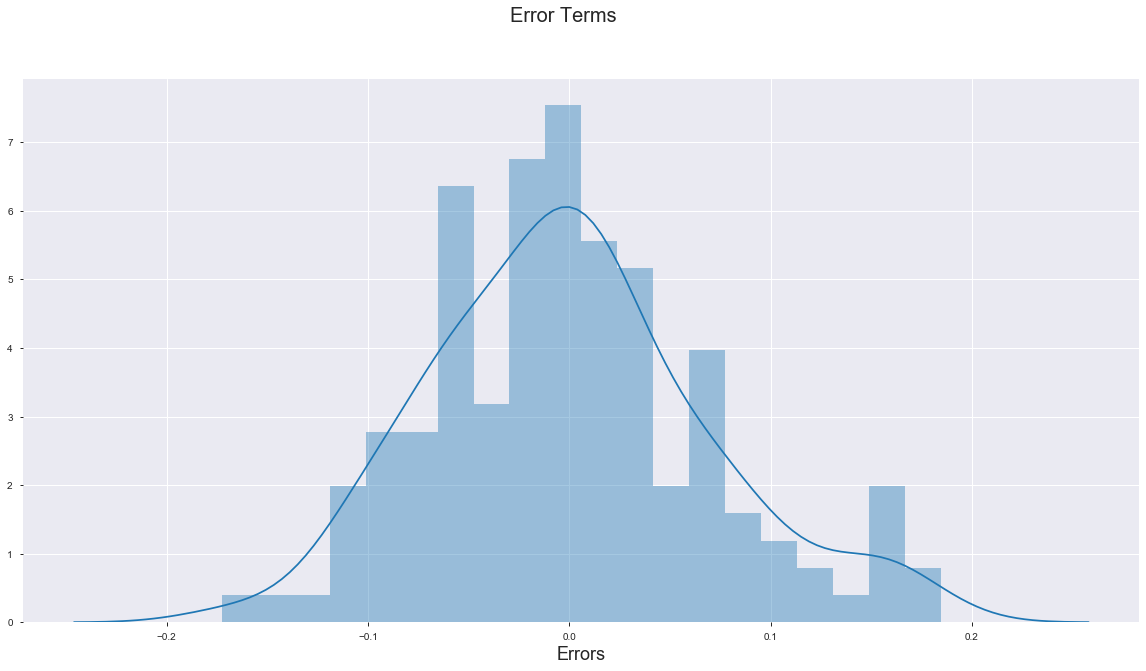

In [74]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(20, 10))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

We observe that **the error terms are normally distributed with mean at 0.**

## Testing the model

In [75]:
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 
                     'boreratio','car_lw_ratio','car_wh_ratio','pw_ratio',
                     'hc_mpg_ratio','stroke','compressionratio','peakrpm',
                     'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
y_test = df_test.pop('price')
X_test = df_test

In [77]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train9= X_train8.drop(['const'], axis=1)
X_test_new = X_test[X_train9.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
y_pred = lm8.predict(X_test_new)

Text(0, 0.5, 'y_pred')

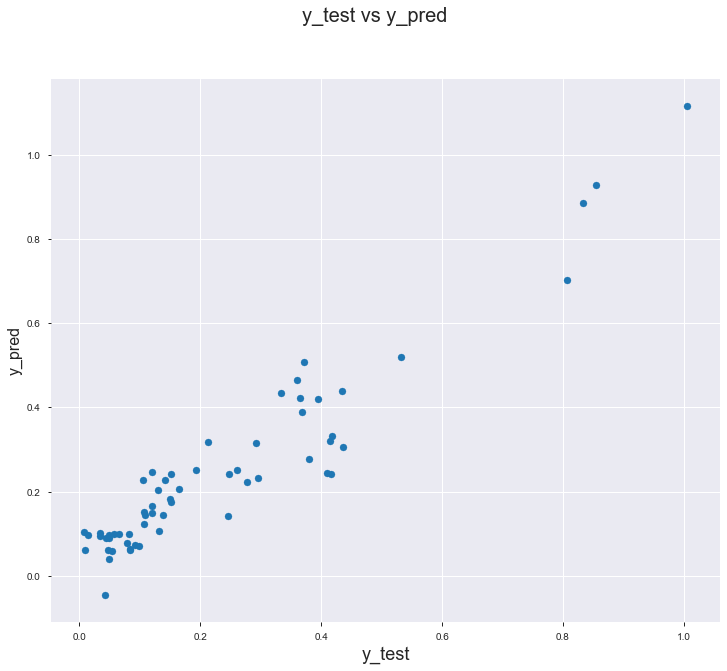

In [79]:
fig = plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score 

In [81]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)                                                        
r2=r2_score(y_test, y_pred)                                                                     
print('Model r2_score:',r2)                                                                      

Model RMSE: 0.0721324324338744
Model r2_score: 0.8918984155449531


**R2 score on test data is quite similar to Adj-R squared of train data set model**
<br> Even the RMSE is quite low
<br> Thus we can say our model performance is reasonably good.

# Conclusion :

Our Final **Predictors** are :     
- **enginelocation**                
- **wheelbase**                     
- **peakrpm**                      
- **car_wh_ratio**                 
- **pw_ratio**                      
- **carbody_convertible**       
- **cylindernumber_four**          
- **company_seg_hightier**  

Thus we get the following as our **Final equation** :
<br><br>
**Price** = 0.2484 - 0.3700 x (**enginelocation**) + 0.5456 x (**wheelbase**) + 0.0077 x (**peakrpm**) + 0.2409 x (**car_wh_ratio**) + 0.1885 x (**pw_ratio**) + 0.2330 x (**carbody_convertible**) - 0.0925 x (**cylindernumber_four**) + 0.2794 x (**company_seg_hightier**)

